# Tabular Playground Series - Oct 2021
## Data Description

This datase is from a kaggle competition. We will be predicting a binary target based on a number of feature columns given in the data. The columns are a mix of scaled continuous features and binary features.

The data is synthetically generated by a GAN that was trained on real-world molecular response data.

In [11]:
import kaggle 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import sklearn
import os

In [2]:
!kaggle competitions download -c tabular-playground-series-oct-2021

100%|█████████████████████████████████████▉| 1.28G/1.29G [02:13<00:00, 13.3MB/s]
100%|██████████████████████████████████████| 1.29G/1.29G [02:14<00:00, 10.3MB/s]


In [5]:
os.listdir()

['Untitled.ipynb',
 'tabular-playground-series-oct-2021.zip',
 '.ipynb_checkpoints']

In [6]:
import zipfile 

with zipfile.ZipFile('tabular-playground-series-oct-2021.zip' , 'r') as file :
    file.extractall('data')

In [9]:
os.listdir('./data/')

['test.csv', 'train.csv', 'sample_submission.csv']

In [24]:
train_df = pd.read_csv('./data/train.csv', index_col='id')
test_df= pd.read_csv('./data/test.csv', index_col='id')
sample_df = pd.read_csv('./data/sample_submission.csv')

In [13]:
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,0,1,0,0,0,0,0,0,0,1
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,...,0,0,0,1,1,0,0,0,0,1
3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,...,0,0,0,0,1,0,0,0,0,1
4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,...,0,1,1,0,1,0,0,1,0,1


In [14]:
train_df.shape , test_df.shape

((1000000, 287), (500000, 286))

In [21]:
train_df.target.value_counts()

1    500485
0    499515
Name: target, dtype: int64

**This dataset has approx. 50% values of both the classes**. So, the base model which gives all the targets as either of the classes, has the accuracy 50%.

In [25]:
train_df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000
mean,0.214334,0.460218,0.129253,0.277598,0.580710,0.416619,0.386532,0.654858,0.462256,0.258031,...,0.250096,0.137164,0.144793,0.130667,0.139210,0.199331,0.156065,0.183741,0.15468,0.500485
std,0.053320,0.101316,0.120805,0.063163,0.115338,0.058231,0.133457,0.065158,0.129439,0.119081,...,0.433068,0.344021,0.351892,0.337036,0.346166,0.399498,0.362917,0.387273,0.36160,0.500000
min,0.041790,0.022016,0.000381,0.000000,0.000000,0.000959,0.000592,0.017994,0.000990,0.051183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.181676,0.389215,0.017692,0.235342,0.497938,0.374390,0.317815,0.615372,0.363753,0.164559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.204498,0.453893,0.095496,0.264669,0.565059,0.414009,0.420260,0.648562,0.475701,0.227714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,0.229684,0.526023,0.177717,0.305837,0.657024,0.458360,0.477140,0.692666,0.561372,0.300988,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,1.000000,0.959019,0.994818,0.979797,1.000000,0.907889,0.972601,0.986195,0.986118,0.980994,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Columns: 286 entries, f0 to target
dtypes: float64(240), int64(46)
memory usage: 2.1 GB


**We don't to apply scaling,encoding or imputing either 'cuz this is a beginner level dataset**

# Train/Validation Dataset

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [32]:
inputs = train_df.drop('target', axis=1 )
targets= train_df.target

In [35]:
train_inputs , val_inputs , train_targets , val_targets = train_test_split(inputs , targets,
                                                                          test_size=0.25)

In [36]:
from sklearn.linear_model import LogisticRegression

# Model Selection for classification
## 1.Logistic Regression

In [42]:
model = LogisticRegression(solver='saga') #model
#fit to training data
model.fit(train_inputs , train_targets )
#predictions on val_inputs
preds= model.predict(val_inputs)
#loss
loss = np.sqrt(mean_squared_error(val_targets , preds))

print("Loss for the logistic Regression model is : " , loss)

Loss for the logistic Regression model is :  0.48895398556510405


In [48]:
print("loss:", loss , "   Accuracy:" , accuracy_score(val_targets , preds))

loss: 0.48895398556510405    Accuracy: 0.760924


So, we've an accuracy of 76% which is way better than a base accuracy of 50%. But let's explore more models...

## 2.DecisionTree

In [59]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1) #model
#fit to training data
model.fit(train_inputs , train_targets )
#predictions on val_inputs
preds= model.predict(val_inputs)
#loss
loss = np.sqrt(mean_squared_error(val_targets , preds))

print("Loss for the Decision tree classifier is : " , loss)
print("Accuracy: " ,accuracy_score(val_targets , preds) )

Loss for the Decision tree classifier is :  0.5765310052373593
Accuracy:  0.667612


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_targets,preds, normalize='true')


array([[0.66700055, 0.33299945],
       [0.33177857, 0.66822143]])

/Users/pranavbobde/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


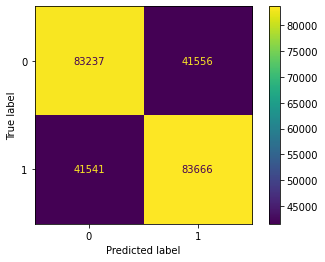

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model ,val_inputs, val_targets)